### Sri Sri Durga Saranyam

In [2]:
# import of required modules
import numpy as np
import matplotlib.pyplot as plt
import time as t

## Q1.

### Q1.a Finding min of two given function

Given two functions are:
1. $f(x) = x^2 + 3x + 4$
2. $f(x) = x^4 - 3x^2 + 2x$

First order derivative of given two functions are:
1. $f(x) = x^2 + 3x + 4$, $ f^\prime(x) = 2x + 3$
2. $f(x) = x^4 - 3x^2 + 2x$, $ f^\prime(x) = 4x^3 - 6x + 2$

Note the first function is a parabola hence it is a convex function. So it does not matter from which point we will start, it will eventually converge into global minima.

For the second function we will plot its graph to know nature of the function.

In [3]:
# Finding min for function1
def gradient_descent(gradient, init_, learn_rate, n_iter=50, tol=1e-06):
    x = init_
    # print(init_)
    for _ in range(n_iter):
        # print(gradient)
        delta = -learn_rate * gradient(x)
        if np.all(np.abs(delta) <= tol):
            break
        x += delta
    return round(x*1000)/1000

# function 1
def func1(x):
    return ((x*x) + (3*x) + 4)

# gradient1 is for calculation for function 1
def gradient1(x):
    return (2*x + 3)

min_val_at = gradient_descent(gradient1, 0, 0.5)

print("Min value of function 1 is: " + str(func1(min_val_at)) + " and this is attained at: " + str(min_val_at))

Min value of function 1 is: 1.75 and this is attained at: -1.5


(-15.0, 30.0)

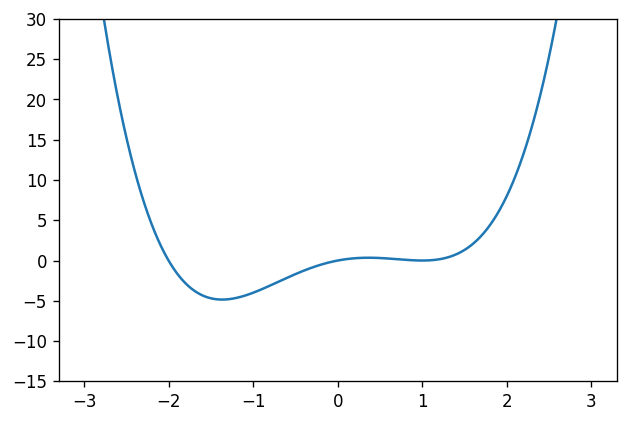

In [4]:
# gradient function for function 2
def gradient2(x):
    return ((4*x*x*x) - (6*x) + 2)

# function 2
def func2(x):
    return (x**4 - 3*x**2 + 2*x)

x_list = np.linspace(-3,3, 5000)
y_list = func2(x_list)
# plt.figure?
plt.figure(0, dpi = 120)
# plt.plot?
plt.plot(x_list, y_list)
plt.ylim(-15,30) # setting limit of y-axis bottom = -15; top = 30

So from the graph we can see that this function has global minimua some where between **[-2,-1]**. So we will choose **-2** as our initial choice to run the gradient descent algorithm.

In [5]:
min_val_at = gradient_descent(gradient2, -2, 0.025)
# print(min_val_at)

# Finding minima value for function 2
print("Min value of function 2 is: " + str(func2(min_val_at)) + " and this is attained at: " + str(min_val_at))

Min value of function 2 is: -4.848076206064 and this is attained at: -1.366


### Q1.b Derivation of update rule for lin reg, while using gradient descent method.

Let us consider we have data, $\{(x_1,y_1), \dots, (x_n, y_n)\}$.

We want to fit linear regression into this data.So, we are interested in the relation $y=ax+b$.

So in order to fit the above relation we have to minimize the mean square error, which is given by $$S = \frac{1}{n} \sum_{i=1}^n (y_i - y_{pred})^2 = \frac{1}{n} \sum_{i=1}^n (y_i - ax_i - b)^2$$ by finding suitable $(a, b)$ which will minimize the error.

We will minimize the above objective function using gradient descent method. Let us first calculate the partial derivativs wrt $a$ and $b$ respectively.

$\begin{align*}
    D_a & =
    \frac{\partial S}{\partial a} \\
     & = \frac{\partial}{\partial a} \frac{1}{n} \sum_{i=1}^n (y_i - ax_i - b)^2 \\
     & = - \frac{2}{n} \sum_{i=1}^n x_i(y_i - ax_i - b) \\
     & = - \frac{2}{n} \sum_{i=1}^n x_i(y_i - y_{pred})
\end{align*}$

$\begin{align*}
    D_b & =
    \frac{\partial S}{\partial b} \\
     & = \frac{\partial}{\partial b} \frac{1}{n} \sum_{i=1}^n (y_i - ax_i - b)^2 \\
     & = - \frac{2}{n} \sum_{i=1}^n (y_i - ax_i - b) \\
     & = - \frac{2}{n} \sum_{i=1}^n (y_i - y_{pred})
\end{align*}$

Hence the update rule will be as follows:
$$a:=a- \lambda D_a$$
$$b:=b -\lambda D_b$$

Where, $\lambda$ is the learning_rate

### Q1.c Generation of artificial data and estimation of lin reg parameters while using gradient descent method

In this problem we are working with artificial data. And the model parameters are known to us. **Thus we have not splited the data into traing set and testing set**.

In this problem we have to update parameter vector. So let us derive the update rule continue from Q1.b derivation.

In Q1.b we have got update rule:
$$a:=a- \lambda D_a$$
$$b:=b -\lambda D_b$$

Where,

$\begin{align*}
    D_a & =
     - \frac{2}{n} \sum_{i=1}^n x_i(y_i - y_{pred})
\end{align*}$

$\begin{align*}
    D_b & =
    - \frac{2}{n} \sum_{i=1}^n (y_i - y_{pred})
\end{align*}$

Now can write,

$\begin{align*}
     \begin{pmatrix}b\\a\end{pmatrix} & =
     \begin{pmatrix}b\\a\end{pmatrix} - \lambda \begin{pmatrix} D_b\\D_a\end{pmatrix} \\
     & = \begin{pmatrix}b\\a\end{pmatrix} - \lambda \begin{pmatrix} - \frac{2}{n} \sum_{i=1}^n (y_i - y_{pred}) \\ - \frac{2}{n} \sum_{i=1}^n x_i(y_i - y_{pred}) \end{pmatrix} \\
     & = \begin{pmatrix}b\\a\end{pmatrix} - \lambda^\prime \begin{pmatrix} \sum_{i=1}^n (y_i - y_{pred}) \\  \sum_{i=1}^n x_i(y_i - y_{pred}) \end{pmatrix}   \: Where, \: \lambda^\prime = -\frac{2\lambda}{n} \\
     & = \begin{pmatrix}b\\a\end{pmatrix} - \lambda^\prime   \begin{pmatrix}1 & 1 & \dots & 1 \\x_1 & x_2 & \dots & x_n \end{pmatrix}    \begin{pmatrix} y_1 - y_{pred} \\ y_2 - y_{pred} \\ \dots \\ y_n - y_{pred}\end{pmatrix} \\
     & = \begin{pmatrix}b\\a\end{pmatrix} - \lambda^\prime   X^t \mathbf{y}
\end{align*}$

Where, 
$
X^t = \begin{pmatrix}1 & 1 & \dots & 1 \\x_1 & x_2 & \dots & x_n \end{pmatrix}
$

$
\mathbf{y} = \begin{pmatrix} y_1 - y_{pred} \\ y_2 - y_{pred} \\ \dots \\ y_n - y_{pred}\end{pmatrix}
$

We will use the following relation to update parameter vector. For a given dataset $\frac{-2}{n}$ is constant, so it is okay if we take it within $\lambda$.
 


In [6]:
# generate artificial data
# We are taking random seed as 17, this will help to regerate this random values
np.random.seed(17)
X = 2.5 * np.random.randn(10000) + 1.5 # Arr of 10000 values with mean = 1.5, stddev = 2.5
res = 1.5 * np.random.randn(10000) # gen 10000 residual terms
y = 2 + 0.3 * X + res


# Start of batch gradient descent
# Objective of this func is to calculate y label based on current parameter value
def predict(X, weight):
    return np.dot(X, weight) 
  
# function to compute gradient of error function w.r.t. theta
def gradient(X, y, weight):
    y_pred = predict(X, weight)
    grad = np.dot(X.transpose(), (y_pred - y)) 
    return grad


# function to perform mini-batch gradient descent
def gradientDescent_1c(X, y, learning_rate, tol=1e-06, n_iter = 1000):
    # print(X.shape[1])
    weight = np.zeros((X.shape[1], 1)) # Initialization of parameters with zeros
    for _ in range(n_iter):
        delta = - learning_rate * gradient(X, y, weight)
        weight = weight + delta 
        if np.all(np.abs(delta) <= tol):
            break
    return weight


X = X.reshape(-1,1)
# print(X.shape)
# print(X.ndim)
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = y.reshape(-1,1)
# print(y.shape)
# print(y.ndim)


tic = t.process_time()
weight = gradientDescent_1c(X, y, 0.00001)
toc = t.process_time()
print( "It took " + str(toc - tic) + " seconds to complete the batch gradient descent ")

print("(intercept, gradient) = (b,a) = " + "(" + str(weight[0]) + ", " + str(weight[1:]) + ")")


It took 0.1933505249999996 seconds to complete the batch gradient descent 
(intercept, gradient) = (b,a) = ([1.9926712], [[0.29946283]])


### Q1.d Implementation of minibatch stochastic gradient descent 

In mini-batch gradient descent we take a sub-set of sample from the whole set. Here we have been asked to implement minibatch stochastic gradient descent. We know that for batch size 1 mini-batch gradient descent is same as minibatch stochastic gradient descent.

Here we have implemented mini-batch gradient descent in general. Our fuction takes batch-size as an argument. so we have passed batch_size = 1, to make it minibatch stochastic gradient descent.

**Some specications of the entire code**

- It has 4 functions
- predict function calculate value of label, based on current parameter values
- gradient function calculates the gradient (Theory is given in the context of Q1.c)
- We have witten a function for generating a list of mini batches from the whole data set
- Finally we have modified our previous function for performing mini-batch gradient descent.

In [8]:
# generate artificial data
np.random.seed(0)
X = 2.5 * np.random.randn(10000) + 1.5 # Arr of 10000 values with mean = 1.5, stddev = 2.5
res = 1.5 * np.random.randn(10000) # gen 10000 residual terms
y = 2 + 0.3 * X + res

# Start of batch gradient descent
def predict(X, weight):
    return np.dot(X, weight) # Returns dot product
  
# function to compute gradient of error function w.r.t. theta
def gradient(X, y, weight):
    y_pred = predict(X, weight)
    grad = np.dot(X.transpose(), (y_pred - y)) 
    return grad

# createing a list of mini-batches
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y)) # grouping all of the data
    np.random.shuffle(data) # make random shuffle of data
    n_minibatches = data.shape[0] // batch_size # calculation of how many batch are there
    i = 0
  
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1] # dropping of last column
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) # take only the last col, and add an extra dim
        mini_batches.append((X_mini, Y_mini))
        # If batch size is not multiple of data set size
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
        
    return mini_batches



# function to perform mini-batch gradient descent
def gradientDescent_1d(X, y, batch_size, learning_rate, tol=1e-06, epoch = 3):
    # print(X.shape[1])
    # Initialization of parameters with zeros
    weight = np.zeros((X.shape[1], 1))
    for _ in range(epoch):
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            delta = - learning_rate * gradient(X_mini, y_mini, weight)
            weight = weight + delta
            if np.all(np.abs(delta) <= tol):
                break
    return weight


X = X.reshape(-1,1)
print(X.shape)
# print(X.ndim)
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = y.reshape(-1,1)
# print(y.shape)
# print(y.ndim)

# calculation of time
tic = t.process_time()
# The 4 parametrs are X the design matrix, labels, batch_size, learning_rate
weight = gradientDescent_1d(X, y, 1, 0.0025) 
toc = t.process_time()
print( "It took " + str(toc - tic) + " seconds to complete the mini-batch gradient descent ")
print("(intercept, gradient) = (b,a) = " + "(" + str(weight[0]) + ", " + str(weight[1:]) + ")")

(10000, 1)
It took 0.18038469700000004 seconds to complete the mini-batch gradient descent 
(intercept, gradient) = (b,a) = ([1.98845244], [[0.29530502]])


### Q1.e Comparison of SGD (stochastic gradient descent) and mini-batch gradient descent with different batch size.

**Note:**
- **If we take _mini-batch size =1_ then it will be a stochastic gradient descent**
- **If we taje _mini-batch size =(data-set size)_ it will be batch gradient descent**
- For this problem we have taken batch size which is 

**Also Note:**
Since for different computer processing time are different, so I have taken screenshots what result I have obtained and I am adding the screenshots in the directory.

In [7]:
# Here we will run gradientDescent_1d for different batch size
np.random.seed(17)
X = 2.5 * np.random.randn(10000) + 1.5 # Arr of 10000 values with mean = 1.5, stddev = 2.5
res = 1.5 * np.random.randn(10000) # gen 10000 residual terms
y = 2 + 0.3 * X + res

X = X.reshape(-1,1)
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = y.reshape(-1,1)

# Here we have used any loop because for each batch size different learning rate was required 

tic = t.process_time()
weight = gradientDescent_1d(X, y, 1, 0.0025)
toc = t.process_time()
print( "It took " + str(toc - tic) + " seconds to complete the mini-batch grad-des with batch_size = 1")
print("(intercept, gradient) = (b,a) = " + "(" + str(weight[0]) + ", " + str(weight[1:]) + ")")
print("\n")


tic = t.process_time()
weight = gradientDescent_1d(X, y, 32, 0.0017)
toc = t.process_time()
print( "It took " + str(toc - tic) + " seconds to complete the mini-batch grad-des with batch_size = 32")
print("(intercept, gradient) = (b,a) = " + "(" + str(weight[0]) + ", " + str(weight[1:]) + ")")
print("\n")


tic = t.process_time()
weight = gradientDescent_1d(X, y, 64, 0.00161)
toc = t.process_time()
print( "It took " + str(toc - tic) + " seconds to complete the mini-batch grad-des with batch_size = 64")
print("(intercept, gradient) = (b,a) = " + "(" + str(weight[0]) + ", " + str(weight[1:]) + ")")
print("\n")

tic = t.process_time()
weight = gradientDescent_1d(X, y, 128, 0.0005)
toc = t.process_time()
print( "It took " + str(toc - tic) + " seconds to complete the mini-batch grad-des with batch_size = 128")
print("(intercept, gradient) = (b,a) = " + "(" + str(weight[0]) + ", " + str(weight[1:]) + ")")
print("\n")

tic = t.process_time()
weight = gradientDescent_1d(X, y, 256, 0.00035)
toc = t.process_time()
print( "It took " + str(toc - tic) + " seconds to complete the mini-batch grad-des with batch_size = 256")
print("(intercept, gradient) = (b,a) = " + "(" + str(weight[0]) + ", " + str(weight[1:]) + ")")
print("\n")

tic = t.process_time()
weight = gradientDescent_1d(X, y, 512, 0.00035)
toc = t.process_time()
print( "It took " + str(toc - tic) + " seconds to complete the mini-batch grad-des with batch_size = 512")
print("(intercept, gradient) = (b,a) = " + "(" + str(weight[0]) + ", " + str(weight[1:]) + ")")
print("\n")

tic = t.process_time()
weight = gradientDescent_1d(X, y, 1024, 0.000205)
toc = t.process_time()
print( "It took " + str(toc - tic) + " seconds to complete the mini-batch with batch_size = 1024")
print("(intercept, gradient) = (b,a) = " + "(" + str(weight[0]) + ", " + str(weight[1:]) + ")")
print("\n")

tic = t.process_time()
weight = gradientDescent_1d(X, y, 2048, 0.000105)
toc = t.process_time()
print( "It took " + str(toc - tic) + " seconds to complete the mini-batch with batch_size = 2048")
print("(intercept, gradient) = (b,a) = " + "(" + str(weight[0]) + ", " + str(weight[1:]) + ")")

It took 0.3378917210000001 seconds to complete the mini-batch grad-des with batch_size = 1
(intercept, gradient) = (b,a) = ([1.99866063], [[0.29739628]])


It took 0.0673356260000002 seconds to complete the mini-batch grad-des with batch_size = 32
(intercept, gradient) = (b,a) = ([1.90714364], [[0.28260718]])


It took 0.044652854999999825 seconds to complete the mini-batch grad-des with batch_size = 64
(intercept, gradient) = (b,a) = ([1.99066927], [[0.36515699]])


It took 0.029542235000000083 seconds to complete the mini-batch grad-des with batch_size = 128
(intercept, gradient) = (b,a) = ([2.01924215], [[0.33107668]])


It took 0.025668881000000088 seconds to complete the mini-batch grad-des with batch_size = 256
(intercept, gradient) = (b,a) = ([1.99220564], [[0.30210517]])


It took 0.025707354999999765 seconds to complete the mini-batch grad-des with batch_size = 512
(intercept, gradient) = (b,a) = ([1.98268469], [[0.26579349]])


It took 0.026217388000000064 seconds to complete

## Comment using the observed result (Q1e)

- We make made the following table based on our observation.
- For batch gradient descent we have used the result obtained in 1.c
- Based on our observation **stochastic gradient descent** is the slowest.
- Also batch gradient descent performed slower.
- Mini-batch gradient descent with batch size 512, 1024, 2048 were the fastest three. \[Not in order\]
- Batch size 256 also done quite well inters of both speed and parameter estimation accuracy
- So we will recommend batch size 256 \[Considering both speed and accuracy\]

| Batch Size | leaning_rate | Time Taken (in sec) | Cal. Val of b | Cal. Val of a | Comment         |
|------------|--------------|---------------------|---------------|---------------|-----------------|
| 1          | 0.0025       | 0.261499            | 1.998660      | 0.297396      |                 |
| 32         | 0.0017       | 0.036875            | 1.907143      | 0.282607      |                 |
| 64         | 0.00161      | 0.030282            | 1.990669      | 0.365156      |                 |
| 128        | 0.0005       | 0.027439            | 2.019242      | 0.331076      |                 |
| 256        | 0.00035      | 0.025568            | 1.992205      | 0.302105      |                 |
| 512        | 0.00035      | 0.024917            | 1.982684      | 0.265793      |                 |
| 1024       | 0.000205     | 0.024603            | 1.971070      | 0.287984      |                 |
| 2048       | 0.000105     | 0.024488            | 1.885805      | 0.315630      |                 |
| 10000      | 0.00001      | 0.097512            | 1.99267       | 0.299462      | Obtained in 1.c |



## Q2

### Q2(i) Probability that someone has both cold and a fever

Given,

$Pr[Fever = T|Cold =T] = 0.307$

and $Pr[Cold = T] = 0.02$

$$\therefore Pr[Fever = T,Cold =T] = Pr[Fever = T|Cold =T]Pr[Cold = T] = 0.307*0.02 = 0.00614$$ **(Ans)**

### Q2(ii) Probability that someone who has a cough has a cold \[calculation in python also given\]

We will use the following notaion in this particular solution.

- **Cou** to denote Cough.
- **LD** to denote Lung Disease.
- **Co** to denote cold. 
- **S** to denote Smoke.
- **T** to denote True.
- **F** to denote False.

Here we have to find the probability, $$Pr[Co=T|Cou=T]$$

Now,

$\begin{align*}
     Pr[Co=T|Cou=T] & =
     \frac{Pr[Co=T, Cou=T]}{Pr[Cou=T]} \\
     & = \frac{\sum_{LD \in \{T,F\}} Pr[Co=T, Cou=T, LD] }  {\sum_{LD, \; Co \in \{T,F\}} Pr[Cou=T, Co, LD]}\\
     & = \frac{Pr[Cou=T, LD=T, Co=T] + Pr[Cou=T, LD=F, Co=T]}  {Pr[Cou=T, LD=T, Co=T] + Pr[Cou=T, LD=T, Co=F] + Pr[Cou=T, LD=F, Co=T] + Pr[Cou=T, LD=F, Co=F]}
\end{align*}$

Before going into calculation of these probabilities we will calculate, $Pr[LD=T]$ and $Pr[LD=F]$ which will prove be necessary later.

$\begin{align*}
     Pr[LD=T] & =
     Pr[LD=T, S=T] + Pr[LD=T, S=F] \\
     & =  Pr[LD=T| S=T] Pr[S=T] + Pr[LD=T| S=F]Pr[S=F]\\
     & =  0.1009 \times 0.2 + 0.001 \times 0.8 \\
     & = 0.02098
\end{align*}$

$\begin{align*}
     Pr[LD=F] & =
     1 - Pr[LD=T] = 0.97902
\end{align*}$

Now calculate the following probabilities,

**Note:** LD and Co are independent.

$\begin{align*}
     Pr[Cou=T, LD=T, Co=T] & =
     Pr[Cou=T| LD=T, Co=T]Pr[LD=T, Co=T] \\
     & = Pr[Cou=T| LD=T, Co=T]Pr[LD=T] Pr[Co=T] \\
     & = 0.7525 \times 0.02098 \times 0.02 \\
     & = 0.000315749
\end{align*}$

$\begin{align*}
     Pr[Cou=T, LD=T, Co=F] & =
     Pr[Cou=T| LD=T, Co=F] Pr[LD=T, Co=F]\\
     & =  Pr[Cou=T| LD=T, Co=F] Pr[LD=T] Pr[Co=F]\\
     & = 0.505 \times 0.02098 \times 0.98 \\
     & = 0.010383002
\end{align*}$

$\begin{align*}
     Pr[Cou=T, LD=F, Co=T] & =
     Pr[Cou=T| LD=F, Co=T] Pr[LD=F, Co=T]\\
     & =  Pr[Cou=T| LD=F, Co=T] Pr[LD=F] Pr[Co=T]\\
     & = 0.505 \times 0.97902 \times 0.02\\
     & = 0.009888102
\end{align*}$

$\begin{align*}
     Pr[Cou=T, LD=F, Co=F] & =
     Pr[Cou=T| LD=F, Co=F] Pr[LD=F, Co=F]\\
     & =  Pr[Cou=T| LD=F, Co=F] Pr[LD=F] Pr[Co=F]\\
     & = 0.01 \times 0.97902 \times 0.98\\
     & = 0.009594396
\end{align*}$

Putting the values in the above formuala we get, $$Pr[Co=T|Cou=T] = 0.338085776$$ **(Ans)**

In [8]:
# Rough calculation for Q2(ii)
# Pr(LD=T) = p1
p1 = (0.1009*0.2) + (0.001*0.8)
# Pr(LD=F) = p2
p2 = 1 - p1
print(p1)

# Pr[Cou=T, LD=T, Co=T]
p3 = 0.7525 * 0.02098 * 0.02
print(p3)

# Pr[Cou=T, LD=T, Co=F]
p4 = 0.505 * 0.02098 * 0.98
print(p4)

#Pr[Cou=T, LD=F, Co=T]
p5 = 0.505 * 0.97902 * 0.02
print(p5)

#Pr[Cou=T, LD=F, Co=F]
p6 = 0.01 * 0.97902 * 0.98
print(p6)

print((p3 + p5)/(p3 + p4 + p5 + p6))



0.020980000000000002
0.000315749
0.010383001999999999
0.009888102
0.009594396
0.33808577637062004


## Q3

### Calculation of maximum likelyhood estimate (MLE) of parameters of multionomial distribution

Here we have to find the MLE estimate of multinomial distribution.

Let us consider we have $n$ random variables $X_1, X_2, \dots, X_n$.

This variables are jointly distributed as multinomial distribution with probability $p_1, p_2, \dots, p_n$ respectively. 

Clearly, $$p_1 + p_2 + \dots + p_n =1$$

Hence, their jouni pmf is given by, $$f(x_1, x_2, \dots, x_n; p_1, p_2, \dots, p_n) = \frac{(x_1+x_2+ \dots + x_n)!}{x_1!x_2! \dots x_n!} p_1^{x_1} p_2^{x_2} \dots p_n^{x_n}$$

**Now consider that we have the following data.**

Also, consider a particular realization of $N$ trails, where these random variables has occurred $x_1, x_2, \dots, x_n$ times.

clearly, $$x_1 + x_2 + \dots + x_n = N$$

So, the likelihood function is given by, $$\mathcal{L}(p_1, p_2, \dots, p_n|x_1, x_2, \dots, x_n) = \frac{N!}{x_1!x_2! \dots x_n!} p_1^{x_1} p_2^{x_2} \dots p_n^{x_n} $$

Or the log-likelihood is given, $$\mathcal{l}(p_1, p_2, \dots, p_n|x_1, x_2, \dots, x_n) = \log(N!) - \sum_{i=1}^n \log(x_i!) + \sum_{i=1}^n x_i \log(p_i)$$

We would like to maximize the log-likelihood wrt to the parameters $p_1, p_2, \dots, p_n$ and subject to the constraint $p_1 + p_2 + \dots + p_n =1$

Or we would like to maximize, $$F(p_1, p_2, \dots, p_n, \lambda)=\log(N!) - \sum_{i=1}^n \log(x_i!) + \sum_{i=1}^n x_i \log(p_i) + \lambda (1-\sum_{i=1}^n p_i)$$
Where $\lambda$ is Lagrange multiplyer

Now,

$\begin{align*}
    \frac{\partial F}{\partial p_i} & =
     \frac{x_i}{p_i} - \lambda , \forall i = 1(1)n
\end{align*}$

$\begin{align*}
    \frac{\partial F}{\partial \lambda} & =
     1-\sum_{i=1}^n p_i
\end{align*}$

Now making, $$\frac{\partial F}{\partial p_1}=\frac{\partial F}{\partial p_2}= \dots = \frac{\partial F}{\partial p_n} = \frac{\partial F}{\partial \lambda} = 0$$

We get,

$$\begin{cases}
                      \frac{x_i}{p_i} - \lambda=0, \forall i = 1(1)n \\
                      1-\sum_{i=1}^n p_i = 0
 \end{cases}$$

Or,

$$\begin{cases}
                      p_i = \frac{x_i}{\lambda}, \forall i = 1(1)n \\
                      1-\sum_{i=1}^n p_i = 0
 \end{cases}$$

Or,

$$\begin{cases}
                      p_i = \frac{x_i}{\lambda}, \forall i = 1(1)n \\
                      \lambda = \sum_{i=1}^n x_i  = N
 \end{cases}$$
 
Hence, the maximum likelihood estimate of parameters are given by, $$(\hat{p_1}, \hat{p_2}, \dots, \hat{p_n}) = (\frac{x_1}{N}, \frac{x_2}{N}, \dots, \frac{x_n}{N}) = (\frac{x_1}{\sum_{i=1}^n x_i}, \frac{x_2}{\sum_{i=1}^n x_i}, \dots, \frac{x_n}{\sum_{i=1}^n x_i})$$